In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline

# Problem 5

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

  * Take a look at the first 10 rows.
  * Look at the last 5 rows. Do you see a problem?
  * Redo the read_csv() call to correct this issue - do not modify the original csv file.



In [141]:
#import gdp_df
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [142]:
#look at the first ten rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [143]:
#look at the last 5 rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


### Our footnotes import with the data!

In [144]:
#import with only 6868 rows

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868)
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


# Problem 6
Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [145]:
gdp_df.drop(columns = 'Value Footnotes', inplace = True)
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


# Problem 7
How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [146]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


The dataset has 6868 rows and 3 columns. None of the types are unexpected; however, it might be handy to have 'Year' as a datetime, so let's convert that.

In [147]:
#gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format = '%Y')

In [148]:
#info
#gdp_df.info()

In [149]:
#gdp_df['Year'].head()

# Problem 8
Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [150]:
gdp_df.groupby('Year')['Country or Area'].count()

Year
1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Country or Area, dtype: int64

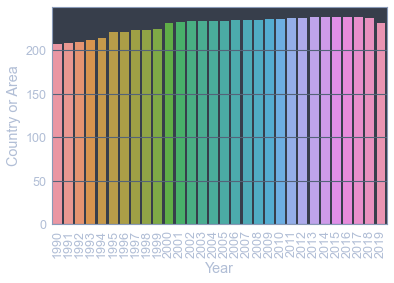

In [151]:
sns.barplot(x = gdp_df.groupby('Year')['Country or Area'].count().index,
            y = gdp_df.groupby('Year')['Country or Area'].count())

ticks = plt.xticks(rotation = 90)

The years range from 1990 to 2019. A given year-country pair gets one row in the data set. Over the 30 years, the entries per year gradually increase, with the exception of 2019, where the total countries drops by 6.

# Problem 9
How many countries are represented in this dataset?

Which countries are least represented in the dataset?

Why do you think these countries have so few observations?

In [152]:
#How many countries are in this dataset?
gdp_df['Country or Area'].value_counts()

Bangladesh                   30
Bahrain                      30
Uzbekistan                   30
Slovenia                     30
Brunei                       30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country or Area, Length: 238, dtype: int64

In [153]:
#Which countries are least represented in the dataset?
gdp_df['Country or Area'].value_counts().tail(10)

Kosovo                       20
Liberia                      20
CuraÃ§ao                     20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country or Area, dtype: int64

There are 238 distinct countries in the dataset. The least represented countries are shown above. I would guess these countries were not officially recognized until the years when they appear in the dataset.

# Problem 10
Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [154]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

# Problem 11
Use .describe() to find the summary statistics for GDP per capita in 2014.

In [155]:
gdp_2014.describe()

,Year,Value
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


# Problem 12
Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:xlabel='Value', ylabel='Count'>

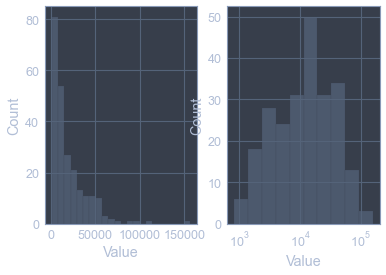

In [156]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.histplot(gdp_2014['Value'], ax = ax1)
sns.histplot(gdp_2014['Value'], log_scale = True, ax = ax2)

The distribution is highly right-skewed. The histogram on the right shows that the distribution is log-normal.

# Problem 13
Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [157]:
#top 5 in 2014
gdp_2014.sort_values('Value', ascending = False).head()

,Country or Area,Year,Value
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [158]:
#bottom 5 in 2014
gdp_2014.sort_values('Value', ascending = False).tail()

,Country or Area,Year,Value
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777
1047,Central African Republic,2014,822.610458


# Problem 14
Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [162]:
gdp_pivoted = gdp_df.pivot_table(values = 'Value', index = 'Country or Area', columns = 'Year').dropna(subset = [1990, 2017])
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country or Area,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,3128.469953,3153.015168
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295


# Problem 15
Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.